5925


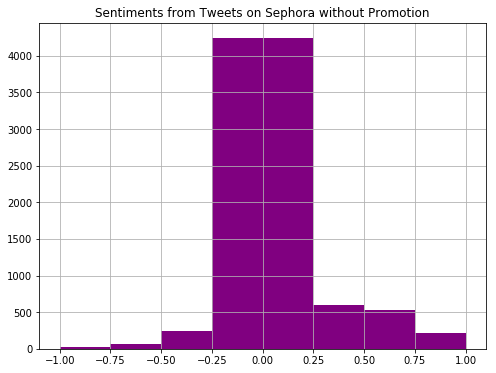

In [21]:
import os
import numpy as np
import urllib.request
import tweepy as tw
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")


os.chdir("/Users/yanghong/Documents/Class/socialMediaMining/")

tweets1 = open("tweet.txt", "r")

tweets = tweets1.readlines()

print(len(tweets))


def remove_url(txt):
    """Replace URLs found in a text string with nothing
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


# Remove URLs
tweets_no_urls = [remove_url(tweet) for tweet in tweets]

# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]


# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]


# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()


fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Sephora without Promotion")
plt.show()

In [3]:
sentiment_df

,polarity,tweet
0,0.375000,When roddy rich said gave her 10 bands just to...
1,-0.400000,Guys theres a Game of Thrones collection at Se...
2,0.000000,should i spend 175 on 13 products at sephora rn
3,0.000000,just wanna take a day and shop in Sephora
4,0.500000,tartecosmetics Sephora Love tarte wanting to t...
5,0.187500,Sis eLLaRie I need yo help I need a good found...
6,0.000000,Gave her 10 racks just to blow in Sephora
7,0.000000,Made a too big Sephora VIB Sale order and thou...
8,0.000000,oh hi
9,0.000000,


In [5]:
sentiment_values[0]

[0.375,
 'When roddy rich said gave her 10 bands just to blow at Sephora I couldnt relate']

In [14]:
ax